In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!/content/drive/MyDrive/Data/ML_Project_Data/train.csv.zip

/bin/bash: line 1: /content/drive/MyDrive/Data/ML_Project_Data/train.csv.zip: Permission denied


In [ ]:
!unzip -q "/content/drive/MyDrive/Data/ML_Project_Data/train.csv.zip" -d "/content/train.csv"
!unzip -q "/content/drive/MyDrive/Data/ML_Project_Data/test.csv.zip" -d "/content/test.csv"

In [ ]:
train = pd.read_csv("/content/train.csv/train.csv")
test = pd.read_csv("/content/test.csv/test.csv")

# Data Exploration

## Variable Identification

In [ ]:
print("Train data shape:", train.shape)
print("Test data shape:", test.shape)


Train data shape: (3116945, 22)
Test data shape: (2077964, 21)


In [ ]:
train.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [ ]:
numeric_col = [col for col in train.columns if train[col].dtype != 'object']
categorical_col = [col for col in train.columns if train[col].dtype == 'object']
print("Numeric columns:", numeric_col)
print("Categorical columns:", categorical_col)

Numeric columns: ['id', 'cap-diameter', 'stem-height', 'stem-width']
Categorical columns: ['class', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']


In [ ]:
target='class'

## First Filter on Features to Analysis

In [ ]:
null_percentage = train.isnull().sum() / len(train) * 100
null_percentage


,0
id,0.000000
class,0.000000
cap-diameter,0.000128
cap-shape,0.001283
cap-surface,21.528227
cap-color,0.000385
does-bruise-or-bleed,0.000257
gill-attachment,16.809280
gill-spacing,40.373988
gill-color,0.001829


In [ ]:
cols_to_drop = null_percentage[null_percentage > 40].index
train = train.drop(cols_to_drop, axis=1)
test = test.drop(cols_to_drop, axis=1)
print("Train data shape after dropping columns:", train.shape)
print("test data shape after dropping columns:", test.shape)

Train data shape after dropping columns: (3116945, 16)
test data shape after dropping columns: (2077964, 15)


In [ ]:
numeric_col = [col for col in train.columns if train[col].dtype != 'object']
categorical_col = [col for col in train.columns if train[col].dtype == 'object']

In [ ]:
null_percentage = test.isnull().sum() / len(test) * 100
null_percentage

,0
id,0.000000
cap-diameter,0.000337
cap-shape,0.001492
cap-surface,21.506821
cap-color,0.000626
does-bruise-or-bleed,0.000481
gill-attachment,16.834796
gill-color,0.002358
stem-height,0.000048
stem-width,0.000000


## Unique values of Categorical features

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
for col in categorical_col:
    print(train[col].value_counts() , '\n','\n')

class
p    1705396
e    1411549
Name: count, dtype: int64 
 

cap-shape
x            1436026
f             676238
s             365146
b             318646
o             108835
p             106967
c             104520
d                 65
e                 60
n                 41
w                 36
t                 36
g                 34
y                 33
r                 32
a                 30
u                 27
z                 22
l                 21
i                 14
k                 13
h                  6
m                  2
8                  2
3.55               2
7 x                2
4.97               2
is s               1
19.29              1
2.85               1
21.56              1
3.6                1
24.16              1
5 f                1
6 x                1
ring-type          1
is p               1
10.13              1
7.43               1
0.82               1
10.46              1
4.22               1
2.77               1
2.94               1
5.15

In [ ]:
def fit_category_info(df, categorical_cols, threshold=0.1):
    category_info = {}

    for col in categorical_cols:
        freqs = df[col].value_counts(normalize=True, dropna=False) * 100
        valid = freqs[freqs > threshold].index.tolist()
        valid = [v for v in valid if pd.notna(v)]  # exclude NaN from valid list -> to impute them later
        category_info[col] = valid

    return category_info

def transform_categories(df, categorical_cols, category_info):
    df = df.copy()

    for col in categorical_cols:
        valid = category_info[col]

        def clean(val):
            if pd.isna(val):
                return np.nan
            return val if val in valid else 'other'

        df[col] = df[col].apply(clean)

    return df

def transform_categories_to_nan(df, categorical_cols, category_info):
    df = df.copy()

    for col in categorical_cols:
        valid = category_info[col]

        def clean(val):
            if pd.isna(val):
                return np.nan
            return val if val in valid else np.nan  # replace other values with NaN

        df[col] = df[col].apply(clean)

    return df

In [ ]:
category_info = fit_category_info(train, categorical_col, threshold=0.1)

categorical_col_noTarget=categorical_col.copy()
categorical_col_noTarget.remove(target)
# train = transform_categories(train, categorical_col_noTarget, category_info)
# test = transform_categories(test, categorical_col_noTarget, category_info)
train = transform_categories_to_nan(train, categorical_col_noTarget, category_info)
test = transform_categories_to_nan(test, categorical_col_noTarget, category_info)

In [ ]:
null_percentage = train.isnull().sum() / len(train) * 100
null_percentage

,0
id,0.000000
class,0.000000
cap-diameter,0.000128
cap-shape,0.018191
cap-surface,21.547541
cap-color,0.011774
does-bruise-or-bleed,0.003754
gill-attachment,16.825353
gill-color,0.015785
stem-height,0.000000


In [ ]:
null_percentage = test.isnull().sum() / len(test) * 100
null_percentage

,0
id,0.000000
cap-diameter,0.000337
cap-shape,0.017710
cap-surface,21.525638
cap-color,0.013523
does-bruise-or-bleed,0.003609
gill-attachment,16.850292
gill-color,0.015785
stem-height,0.000048
stem-width,0.000000


In [ ]:
for col in categorical_col:
    print(train[col].value_counts() , '\n','\n')

class
p    1705396
e    1411549
Name: count, dtype: int64 
 

cap-shape
x    1436026
f     676238
s     365146
b     318646
o     108835
p     106967
c     104520
Name: count, dtype: int64 
 

cap-surface
t    460777
s    384970
y    327826
h    284460
g    263729
d    206832
k    128875
e    119712
i    113440
w    109840
l     44859
Name: count, dtype: int64 
 

cap-color
n    1359542
y     386627
w     379442
g     210825
e     197290
o     178847
p      91838
r      78236
u      73172
b      61313
k      59888
l      39558
Name: count, dtype: int64 
 

does-bruise-or-bleed
f    2569743
t     547085
Name: count, dtype: int64 
 

gill-attachment
a    646034
d    589236
x    360878
e    301858
s    295439
p    279110
f    119953
Name: count, dtype: int64 
 

gill-color
w    931538
n    543386
y    469464
p    343626
g    212164
o    157119
k    127970
f    119694
r     62799
e     56047
b     47247
u     45399
Name: count, dtype: int64 
 

stem-color
w    1196637
n    1003464
y     37

In [ ]:
train['class'] = train['class'].map({'p': 1, 'e': 0})

In [ ]:
X = train.drop(columns=['class'])
y = train['class']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
train = X_train.copy()
train['class'] = y_train

val = X_val.copy()
val['class'] = y_val

In [ ]:
train_noNaN = train.dropna()

## Univariant Analysis

In [ ]:
categorical_cols = train_noNaN.select_dtypes(include='object').columns.to_list() + ['class']

numerical_cols = train_noNaN.select_dtypes(include=['float64', 'int64']).columns.to_list()
numerical_cols = [col for col in numerical_cols if col != 'class']

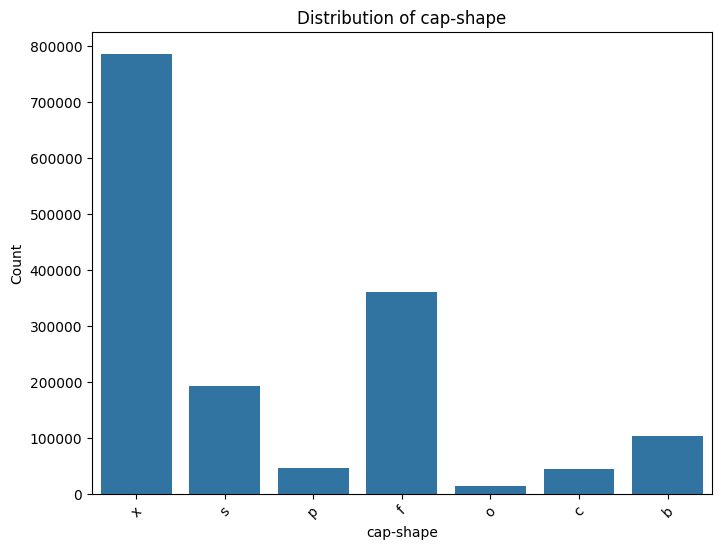

Value counts for cap-shape:
cap-shape
x    786102
f    360003
s    191681
b    101986
p     44805
c     44658
o     12754
Name: count, dtype: int64

Percentage distribution for cap-shape:
cap-shape
x    50.979741
f    23.346665
s    12.430763
b     6.613925
p     2.905663
c     2.896130
o     0.827114
Name: proportion, dtype: float64
--------------------------------------------------


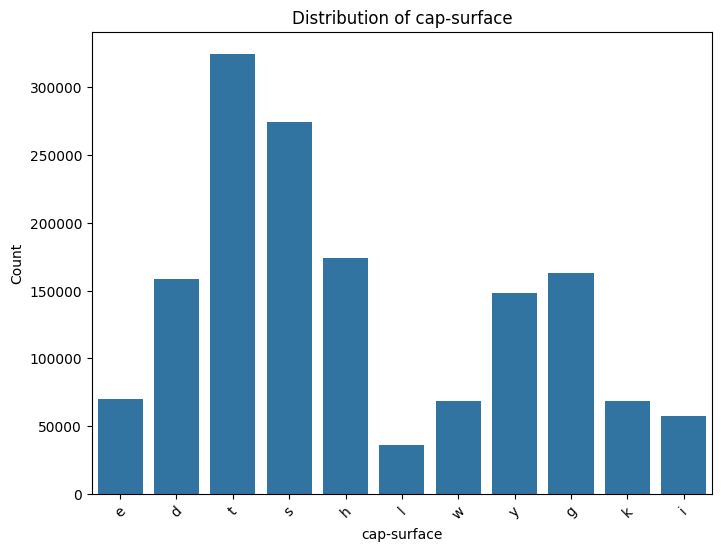

Value counts for cap-surface:
cap-surface
t    324842
s    274494
h    173720
g    162654
d    158198
y    147895
e     70088
w     68482
k     68327
i     57469
l     35820
Name: count, dtype: int64

Percentage distribution for cap-surface:
cap-surface
t    21.066428
s    17.801294
h    11.265969
g    10.548324
d    10.259347
y     9.591184
e     4.545298
w     4.441147
k     4.431095
i     3.726940
l     2.322974
Name: proportion, dtype: float64
--------------------------------------------------


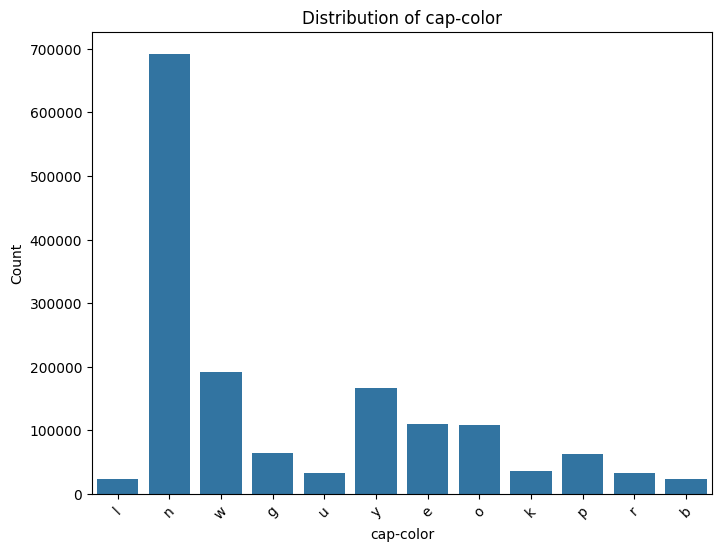

Value counts for cap-color:
cap-color
n    692183
w    191485
y    166364
e    109957
o    107420
g     64461
p     63055
k     36443
r     32938
u     32184
l     22795
b     22704
Name: count, dtype: int64

Percentage distribution for cap-color:
cap-color
n    44.888971
w    12.418052
y    10.788923
e     7.130855
o     6.966327
g     4.180380
p     4.089199
k     2.363376
r     2.136072
u     2.087174
l     1.478286
b     1.472384
Name: proportion, dtype: float64
--------------------------------------------------


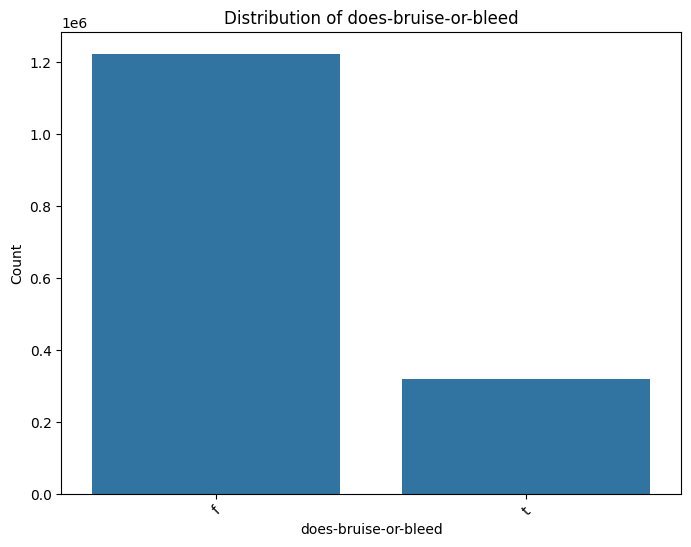

Value counts for does-bruise-or-bleed:
does-bruise-or-bleed
f    1222085
t     319904
Name: count, dtype: int64

Percentage distribution for does-bruise-or-bleed:
does-bruise-or-bleed
f    79.253808
t    20.746192
Name: proportion, dtype: float64
--------------------------------------------------


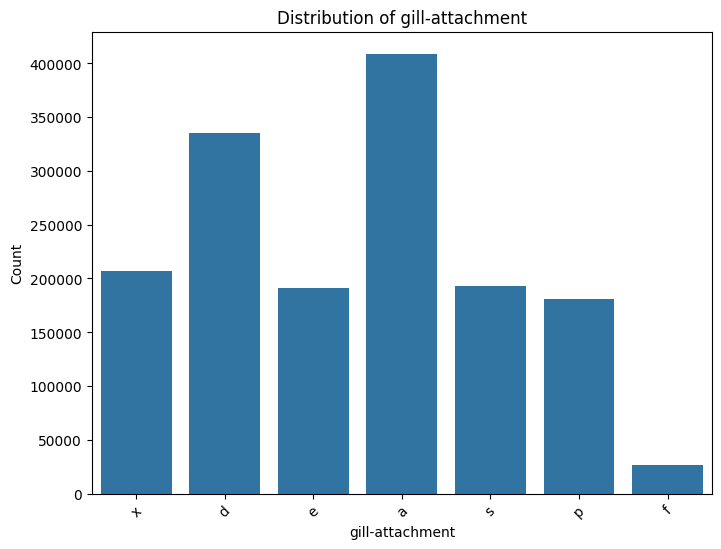

Value counts for gill-attachment:
gill-attachment
a    409191
d    334910
x    206550
s    192981
e    191204
p    180995
f     26158
Name: count, dtype: int64

Percentage distribution for gill-attachment:
gill-attachment
a    26.536571
d    21.719351
x    13.395037
s    12.515070
e    12.399829
p    11.737762
f     1.696380
Name: proportion, dtype: float64
--------------------------------------------------


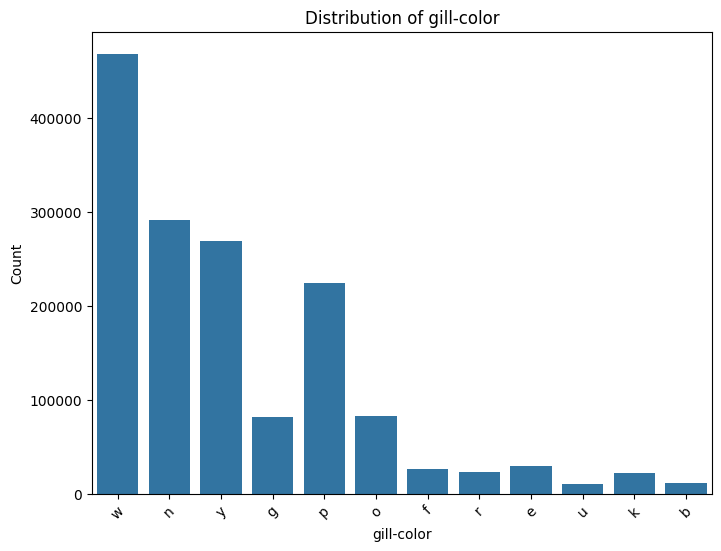

Value counts for gill-color:
gill-color
w    468668
n    291254
y    269226
p    224854
o     83084
g     81810
e     29774
f     26017
r     23076
k     22501
b     11711
u     10014
Name: count, dtype: int64

Percentage distribution for gill-color:
gill-color
w    30.393732
n    18.888202
y    17.459658
p    14.582075
o     5.388106
g     5.305485
e     1.930883
f     1.687236
r     1.496509
k     1.459219
b     0.759474
u     0.649421
Name: proportion, dtype: float64
--------------------------------------------------


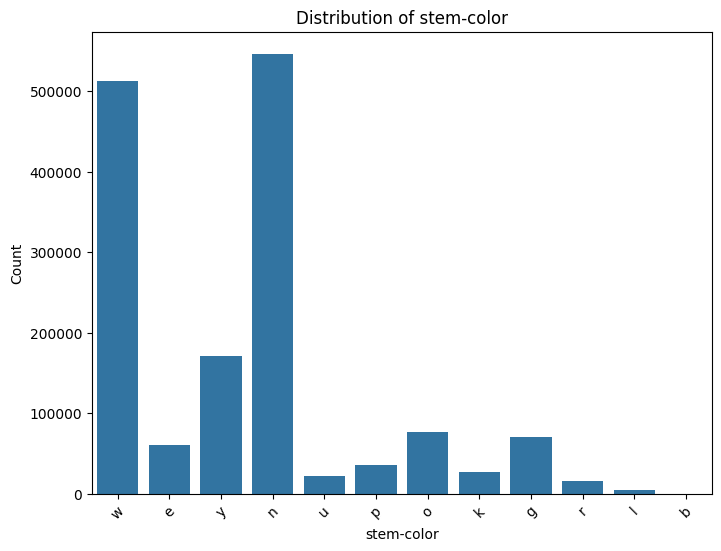

Value counts for stem-color:
stem-color
n    546160
w    511816
y    170458
o     77231
g     70803
e     61096
p     35912
k     26828
u     21902
r     15313
l      4425
b        45
Name: count, dtype: int64

Percentage distribution for stem-color:
stem-color
n    35.419189
w    33.191936
y    11.054424
o     5.008531
g     4.591667
e     3.962155
p     2.328940
k     1.739831
u     1.420373
r     0.993068
l     0.286967
b     0.002918
Name: proportion, dtype: float64
--------------------------------------------------


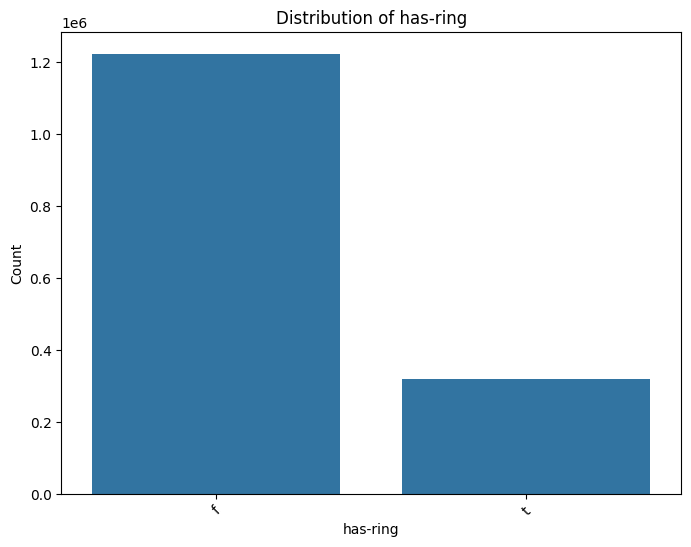

Value counts for has-ring:
has-ring
f    1222216
t     319773
Name: count, dtype: int64

Percentage distribution for has-ring:
has-ring
f    79.262303
t    20.737697
Name: proportion, dtype: float64
--------------------------------------------------


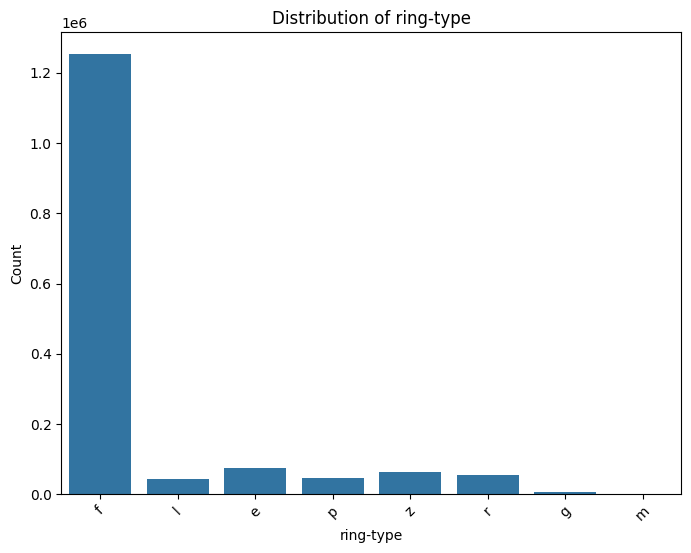

Value counts for ring-type:
ring-type
f    1252520
e      74603
z      64443
r      54087
p      45939
l      44671
g       5685
m         41
Name: count, dtype: int64

Percentage distribution for ring-type:
ring-type
f    81.227557
e     4.838102
z     4.179213
r     3.507613
p     2.979204
l     2.896973
g     0.368680
m     0.002659
Name: proportion, dtype: float64
--------------------------------------------------


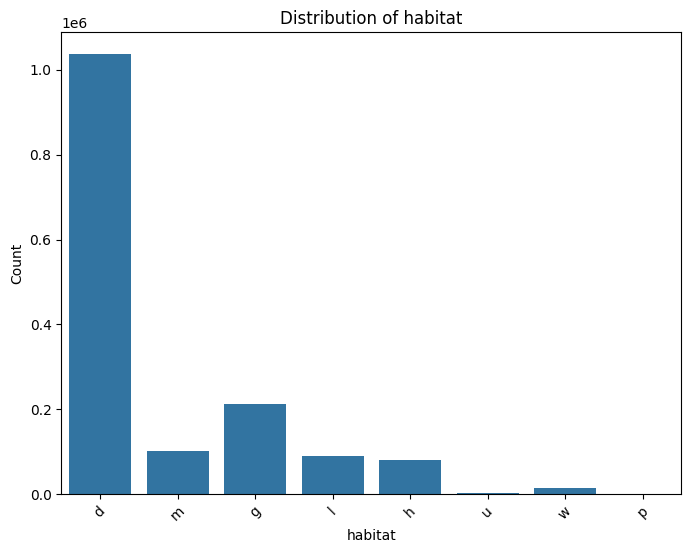

Value counts for habitat:
habitat
d    1036517
g     212990
m     101569
l      90361
h      81460
w      14884
u       4154
p         54
Name: count, dtype: int64

Percentage distribution for habitat:
habitat
d    67.219481
g    13.812680
m     6.586882
l     5.860029
h     5.282787
w     0.965247
u     0.269392
p     0.003502
Name: proportion, dtype: float64
--------------------------------------------------


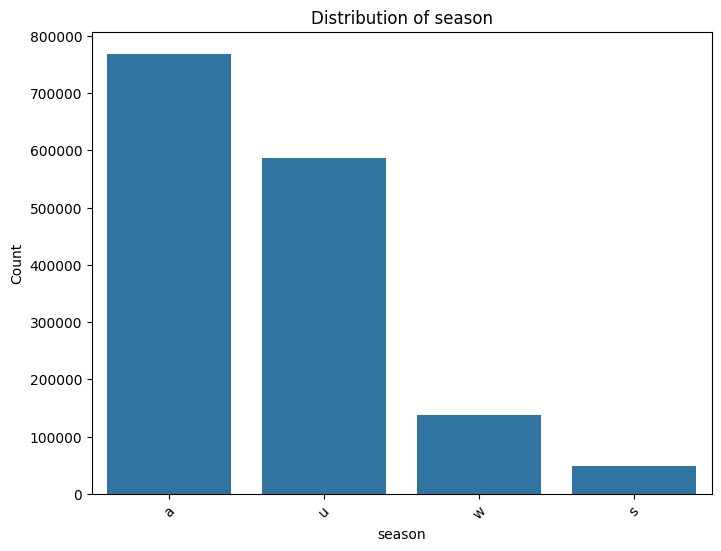

Value counts for season:
season
a    768612
u    586550
w    137999
s     48828
Name: count, dtype: int64

Percentage distribution for season:
season
a    49.845492
u    38.038533
w     8.949415
s     3.166560
Name: proportion, dtype: float64
--------------------------------------------------


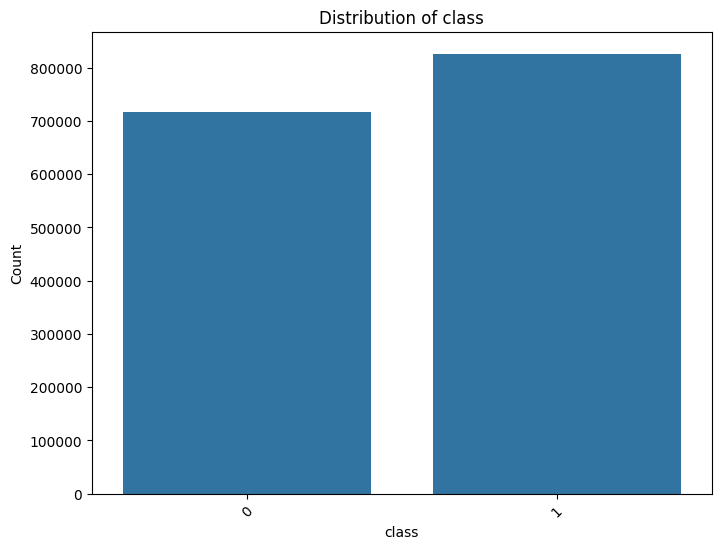

Value counts for class:
class
1    826212
0    715777
Name: count, dtype: int64

Percentage distribution for class:
class
1    53.580927
0    46.419073
Name: proportion, dtype: float64
--------------------------------------------------


In [ ]:
# ------------------ Univariate Analysis for Categorical Features ------------------

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=train_noNaN, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    # Display the counts of unique values
    print(f'Value counts for {col}:')
    print(train_noNaN[col].value_counts())
    print(f'\nPercentage distribution for {col}:')
    print(train_noNaN[col].value_counts(normalize=True) * 100)
    print('-' * 50)

In [ ]:
numerical_cols.remove('id')

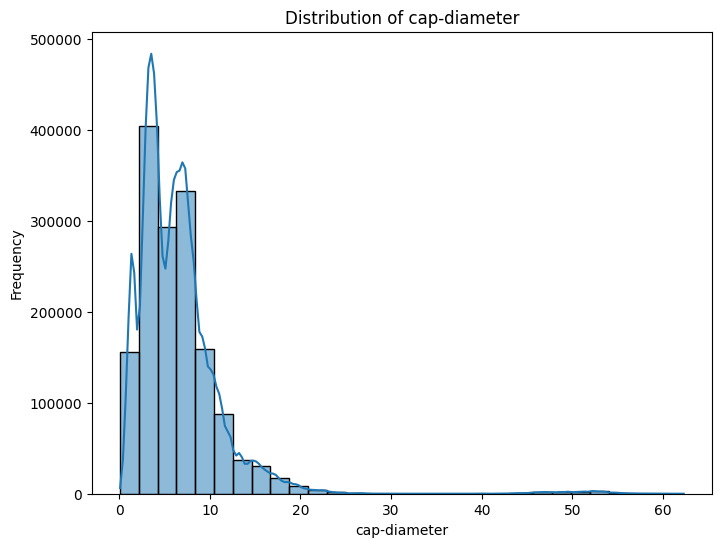

Descriptive statistics for cap-diameter:
count    1.541989e+06
mean     6.577091e+00
std      5.215696e+00
min      1.000000e-01
25%      3.480000e+00
50%      5.820000e+00
75%      8.200000e+00
max      6.230000e+01
Name: cap-diameter, dtype: float64
--------------------------------------------------


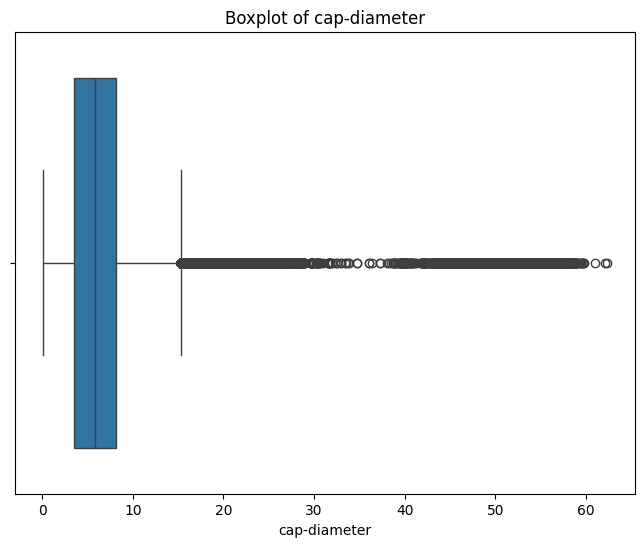

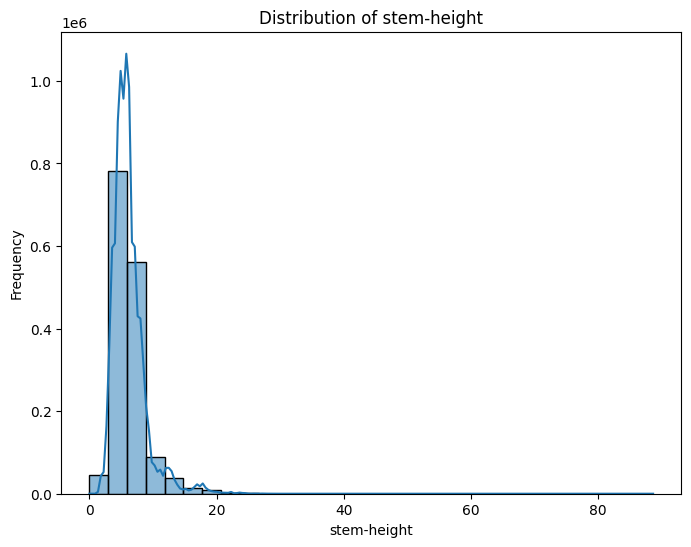

Descriptive statistics for stem-height:
count    1.541989e+06
mean     6.203603e+00
std      2.632948e+00
min      0.000000e+00
25%      4.610000e+00
50%      5.750000e+00
75%      7.140000e+00
max      8.872000e+01
Name: stem-height, dtype: float64
--------------------------------------------------


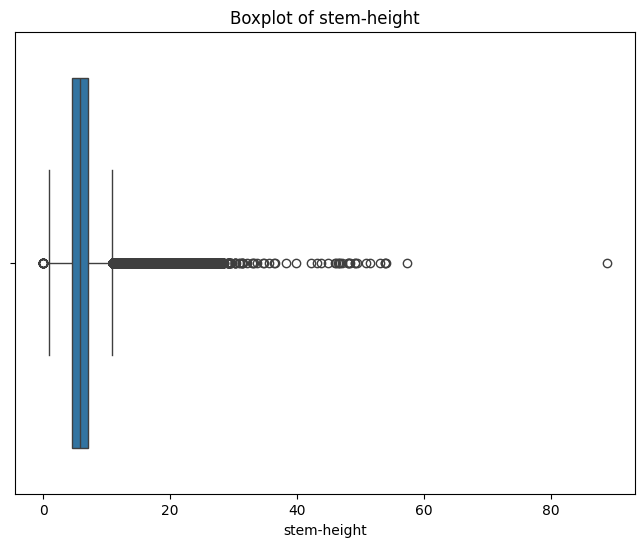

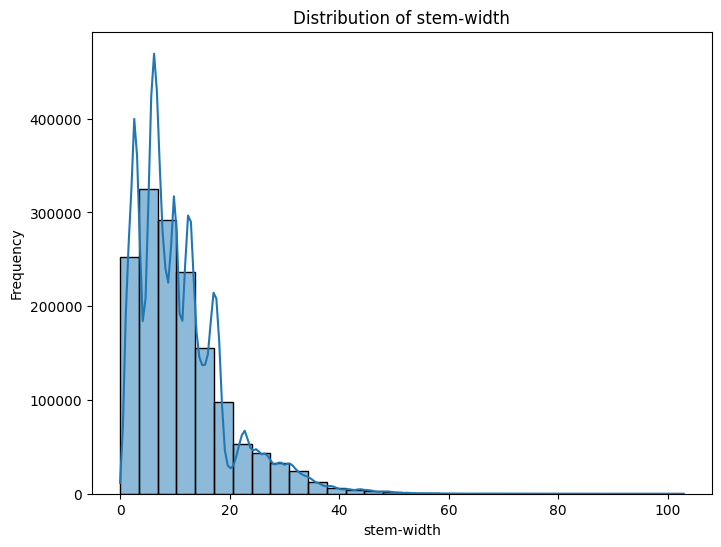

Descriptive statistics for stem-width:
count    1.541989e+06
mean     1.111404e+01
std      8.329300e+00
min      0.000000e+00
25%      5.460000e+00
50%      9.350000e+00
75%      1.493000e+01
max      1.029000e+02
Name: stem-width, dtype: float64
--------------------------------------------------


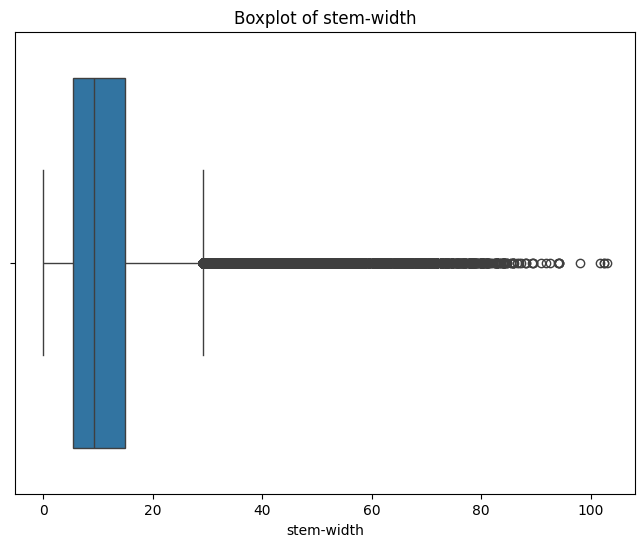

In [ ]:
# ------------------ Univariate Analysis for Numerical Features ------------------

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(train_noNaN[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Display descriptive statistics for numerical columns
    print(f'Descriptive statistics for {col}:')
    print(train_noNaN[col].describe())
    print('-' * 50)

    # Boxplot to check for outliers
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=train_noNaN[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

## Bivariant Analysis

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
categorical_cols.remove('class')

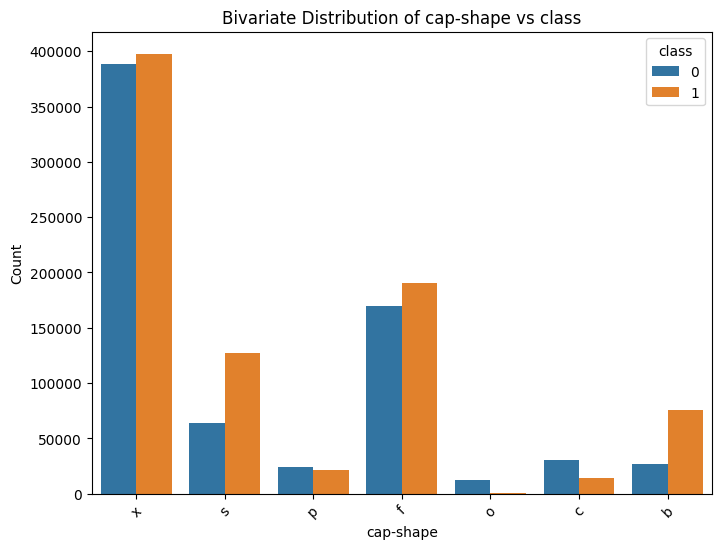

Chi-squared test for cap-shape vs class:
Chi2: 53708.778989029895, p-value: 0.0
**************************************************


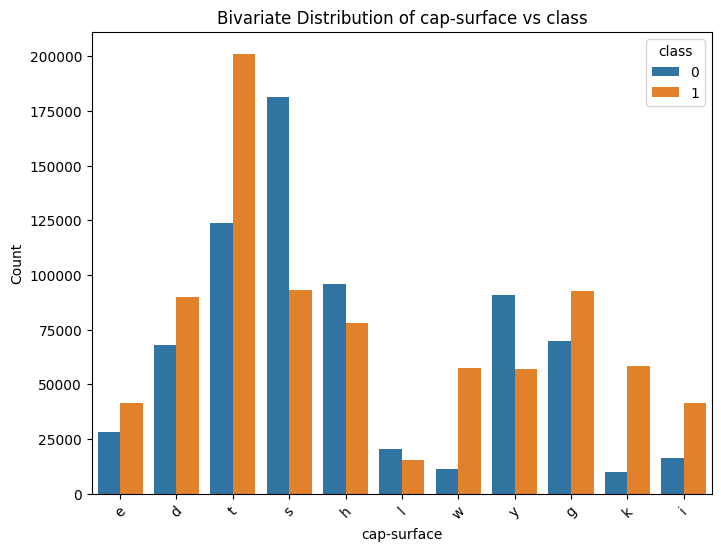

Chi-squared test for cap-surface vs class:
Chi2: 134646.02529185047, p-value: 0.0
**************************************************


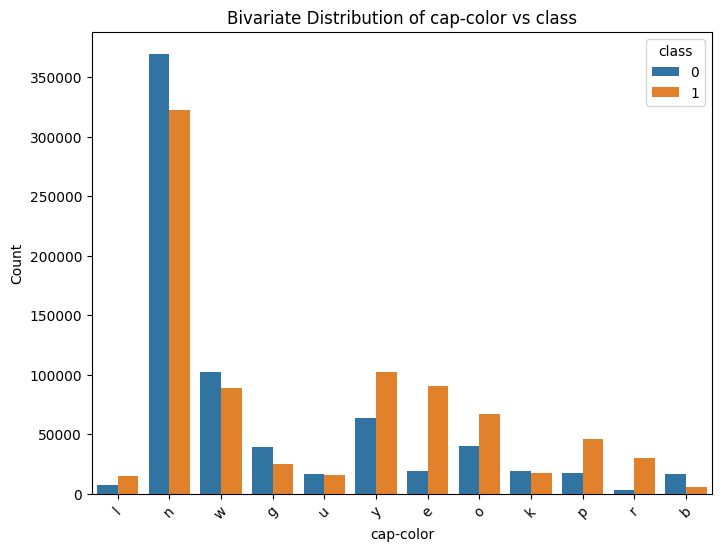

Chi-squared test for cap-color vs class:
Chi2: 103406.20421175637, p-value: 0.0
**************************************************


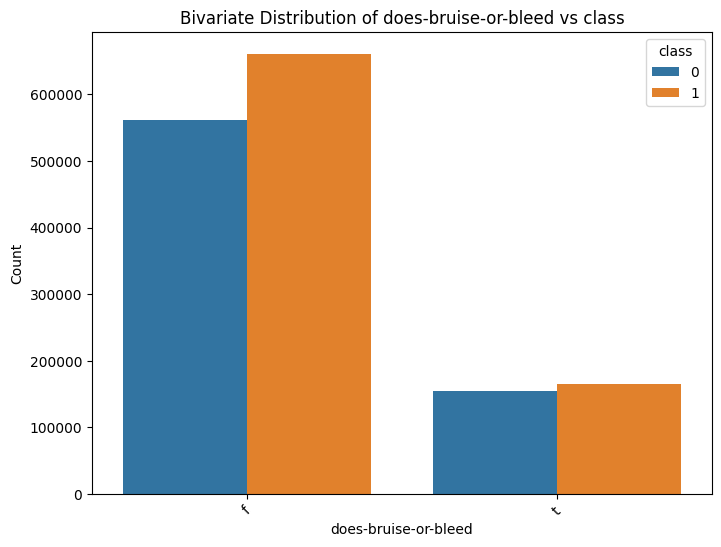

Chi-squared test for does-bruise-or-bleed vs class:
Chi2: 530.9023652932098, p-value: 1.7973583732328518e-117
**************************************************


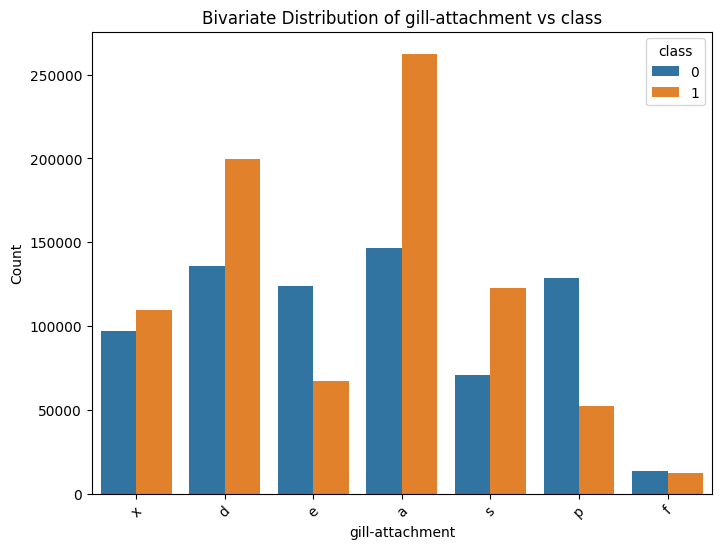

Chi-squared test for gill-attachment vs class:
Chi2: 101288.28880970505, p-value: 0.0
**************************************************


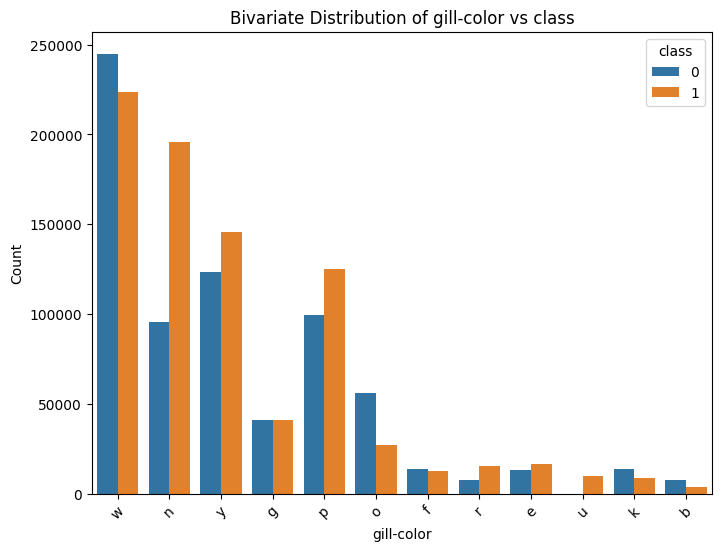

Chi-squared test for gill-color vs class:
Chi2: 57583.14891315284, p-value: 0.0
**************************************************


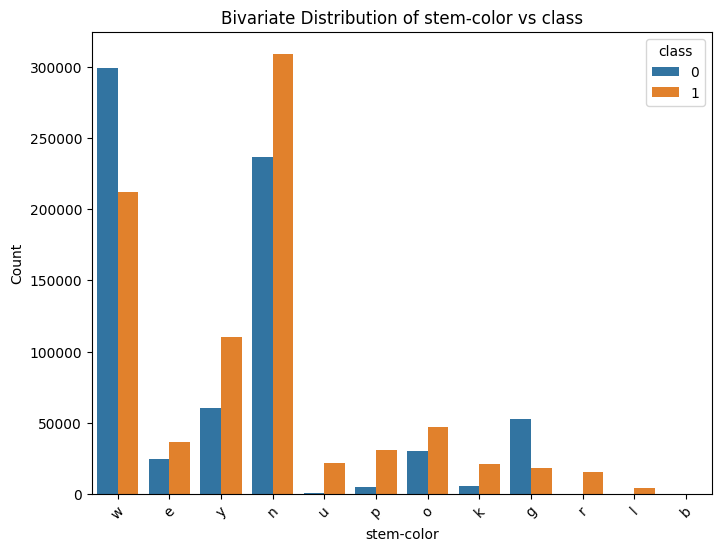

Chi-squared test for stem-color vs class:
Chi2: 122847.51974723193, p-value: 0.0
**************************************************


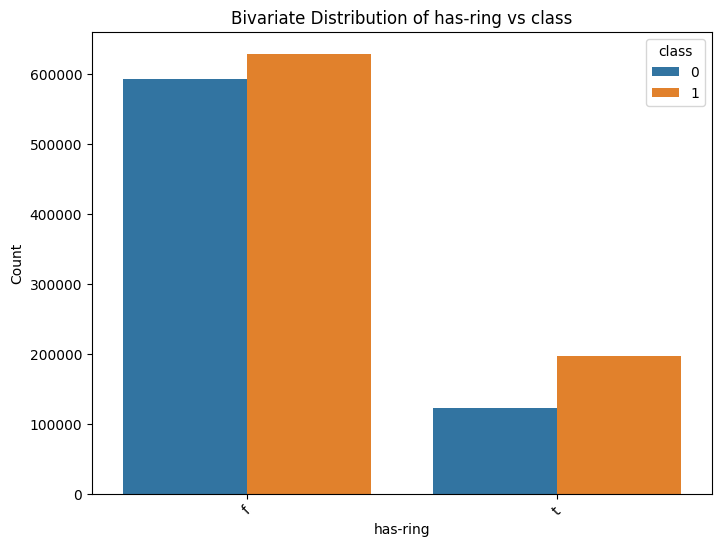

Chi-squared test for has-ring vs class:
Chi2: 10323.127226260543, p-value: 0.0
**************************************************


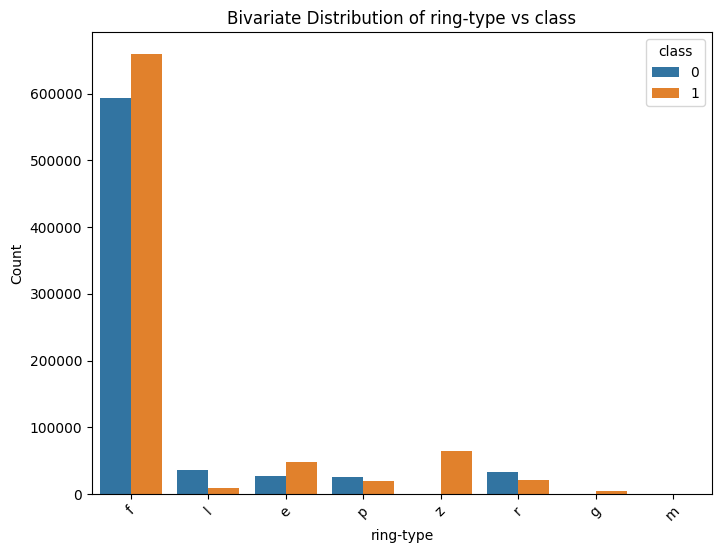

Chi-squared test for ring-type vs class:
Chi2: 90238.65840724252, p-value: 0.0
**************************************************


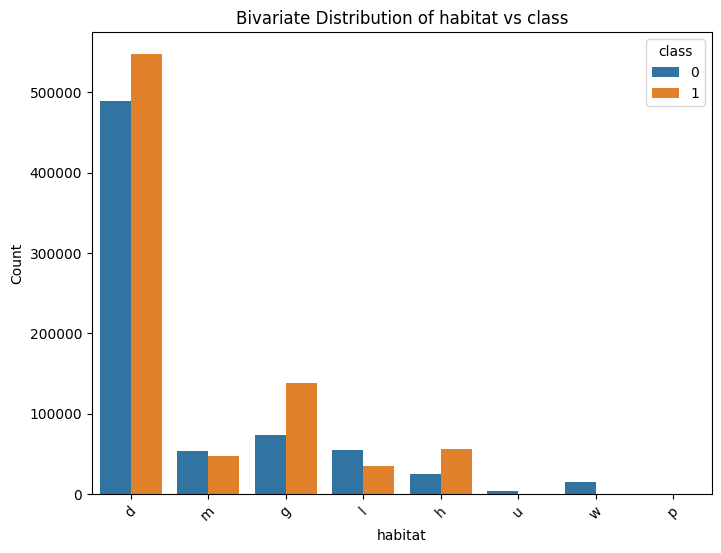

Chi-squared test for habitat vs class:
Chi2: 50474.75065423056, p-value: 0.0
**************************************************


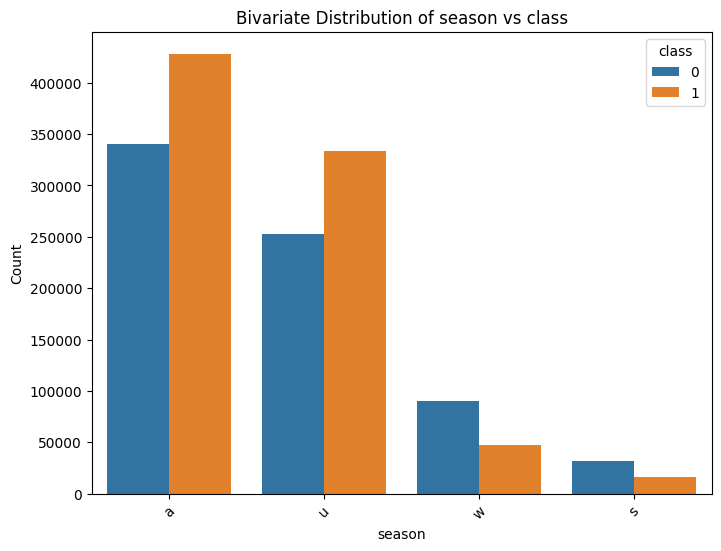

Chi-squared test for season vs class:
Chi2: 31984.322245109684, p-value: 0.0
**************************************************


In [ ]:
# ------------------ Bivariate Analysis for Categorical Features ------------------

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=train_noNaN, x=col, hue='class')
    plt.title(f'Bivariate Distribution of {col} vs class')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    # Calculate Chi-squared test for categorical features
    crosstab = pd.crosstab(train_noNaN[col], train_noNaN['class'])
    chi2, p, _, _ = chi2_contingency(crosstab)
    print(f'Chi-squared test for {col} vs class:')
    print(f'Chi2: {chi2}, p-value: {p}')
    print(f'{"*" * 50}')

In [ ]:
# Chi-Squared Test: This statistical test is used to assess whether there's a significant relationship between a categorical feature and the target variable.
# If the p-value is low (usually < 0.05), it suggests that the feature is related to the target.

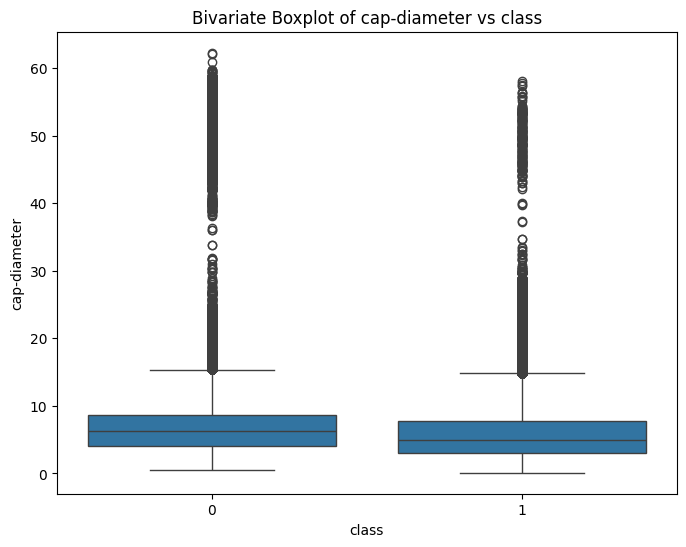

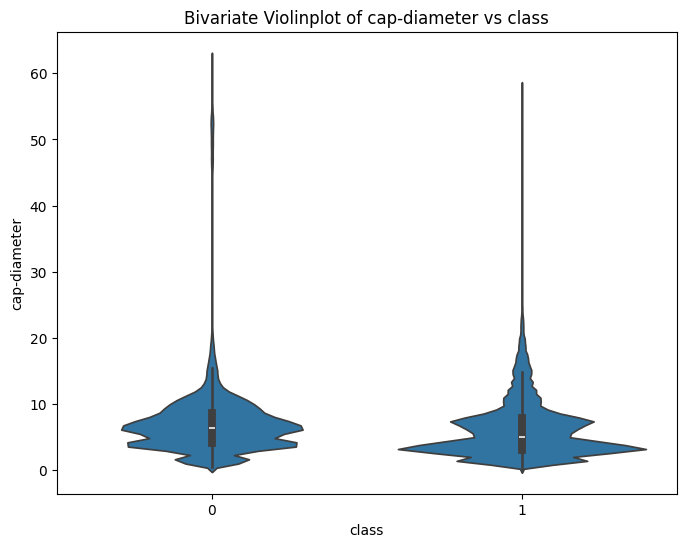

Correlation between cap-diameter and class: -0.11529953305141552
**************************************************


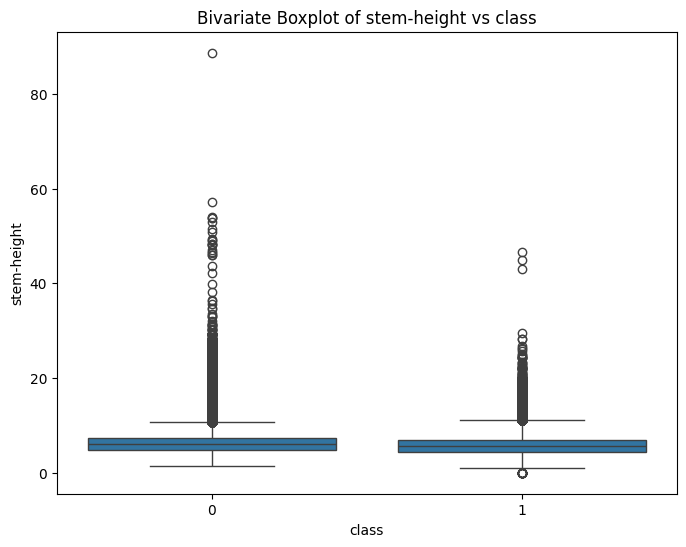

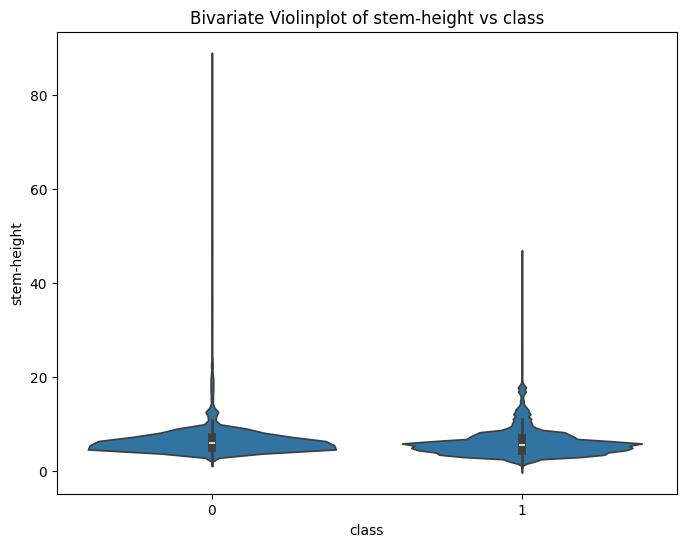

Correlation between stem-height and class: -0.08317931898170804
**************************************************


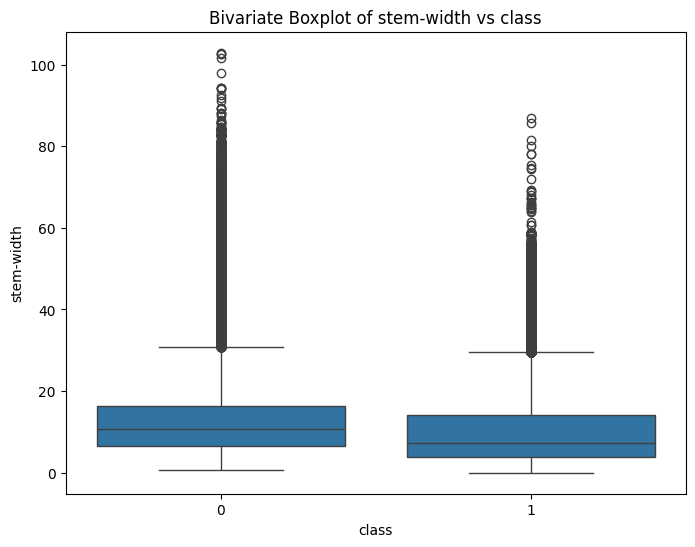

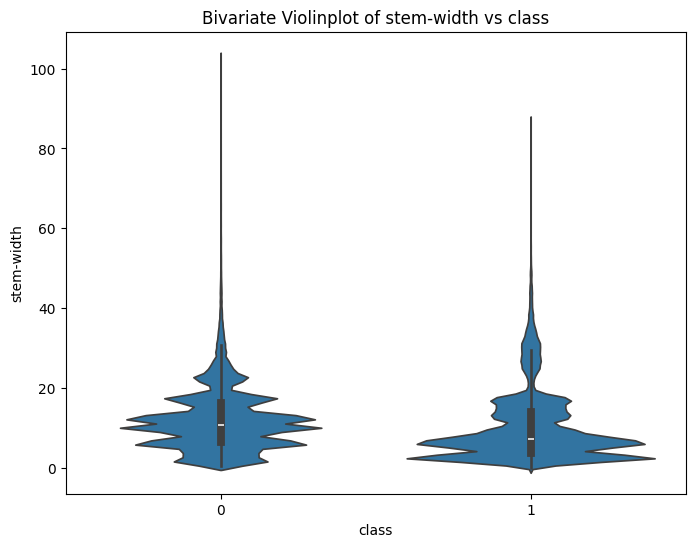

Correlation between stem-width and class: -0.11107333862332487
**************************************************


In [ ]:
# ------------------ Bivariate Analysis for Numerical Features ------------------

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='class', y=col, data=train_noNaN)
    plt.title(f'Bivariate Boxplot of {col} vs class')
    plt.xlabel('class')
    plt.ylabel(col)
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.violinplot(x='class', y=col, data=train_noNaN)
    plt.title(f'Bivariate Violinplot of {col} vs class')
    plt.xlabel('class')
    plt.ylabel(col)
    plt.show()

    # Calculate correlation between numerical features and class
    correlation = train_noNaN[col].corr(train_noNaN['class'])
    print(f'Correlation between {col} and class: {correlation}')
    print(f'{"*" * 50}')

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.1 MB/s eta 0:00:00


In [ ]:
from category_encoders import TargetEncoder

In [ ]:
categorical_cols = train_noNaN.select_dtypes(include='object').columns.tolist()
categorical_cols

['cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-color',
 'stem-color',
 'has-ring',
 'ring-type',
 'habitat',
 'season']

In [ ]:
target_encoder = TargetEncoder(cols=categorical_cols)
target_encoder.fit(train_noNaN[categorical_cols], train_noNaN['class'])

TargetEncoder(cols=['cap-shape', 'cap-surface', 'cap-color',
                    'does-bruise-or-bleed', 'gill-attachment', 'gill-color',
                    'stem-color', 'has-ring', 'ring-type', 'habitat',
                    'season'])

In [ ]:
# Transform train (with nulls), restore nulls
train_encoded = train.copy()
train_transformed = target_encoder.transform(train_encoded[categorical_cols])
train_transformed = train_transformed.where(~train_encoded[categorical_cols].isna(), np.nan)
train_encoded[categorical_cols] = train_transformed

# Transform val (no target leakage — only using target_encoder fitted on train)
val_encoded = val.copy()
val_transformed = target_encoder.transform(val_encoded[categorical_cols])
val_transformed = val_transformed.where(~val_encoded[categorical_cols].isna(), np.nan)
val_encoded[categorical_cols] = val_transformed

# Transform test
test_encoded = test.copy()
test_transformed = target_encoder.transform(test_encoded[categorical_cols])
test_transformed = test_transformed.where(~test_encoded[categorical_cols].isna(), np.nan)
test_encoded[categorical_cols] = test_transformed


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='mean')
train_features = train_encoded.drop(columns=['class'])  # Exclude target from train
imputer.fit(train_features)

SimpleImputer()

In [ ]:
train_imputed = train_encoded.copy()
train_imputed[train_features.columns] = imputer.transform(train_features)

val_features = val_encoded.drop(columns=['class'])  # Exclude target from val
val_imputed = val_encoded.copy()
val_imputed[val_features.columns] = imputer.transform(val_features)

test_features = test_encoded  # No target column in test set
test_imputed = test_encoded.copy()
test_imputed[test_features.columns] = imputer.transform(test_features)

In [ ]:
null_percentage_train = train_imputed.isnull().sum() / len(train_imputed) * 100
print("Null percentages in train set:\n", null_percentage_train)

null_percentage_val = val_imputed.isnull().sum() / len(val_imputed) * 100
print("\nNull percentages in validation set:\n", null_percentage_val)

null_percentage_test = test_imputed.isnull().sum() / len(test_imputed) * 100
print("\nNull percentages in test set:\n", null_percentage_test)


Null percentages in train set:
 id                      0.0
cap-diameter            0.0
cap-shape               0.0
cap-surface             0.0
cap-color               0.0
does-bruise-or-bleed    0.0
gill-attachment         0.0
gill-color              0.0
stem-height             0.0
stem-width              0.0
stem-color              0.0
has-ring                0.0
ring-type               0.0
habitat                 0.0
season                  0.0
class                   0.0
dtype: float64

Null percentages in validation set:
 id                      0.0
cap-diameter            0.0
cap-shape               0.0
cap-surface             0.0
cap-color               0.0
does-bruise-or-bleed    0.0
gill-attachment         0.0
gill-color              0.0
stem-height             0.0
stem-width              0.0
stem-color              0.0
has-ring                0.0
ring-type               0.0
habitat                 0.0
season                  0.0
class                   0.0
dtype: float64

Nul

# correlation

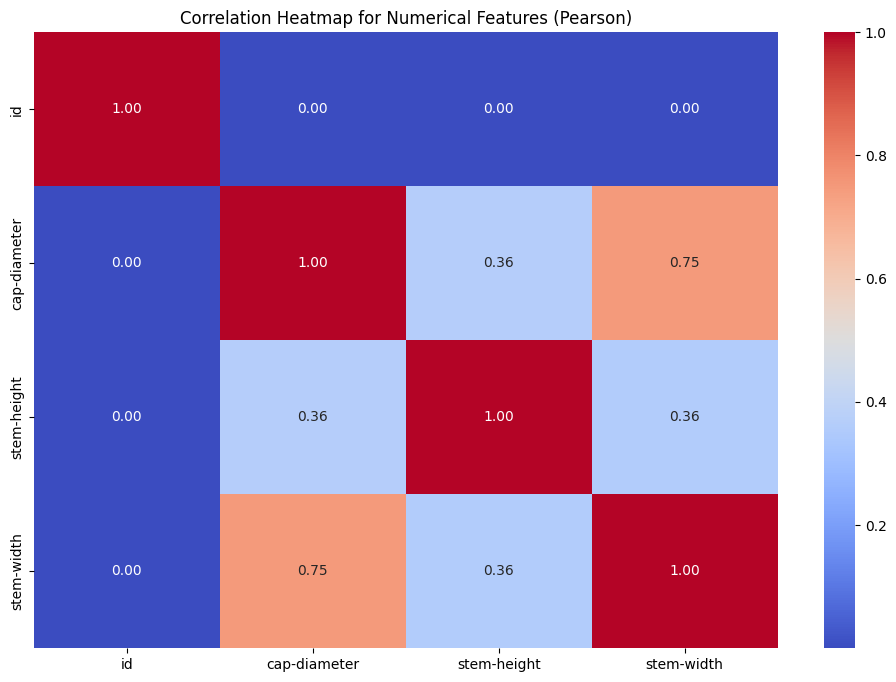

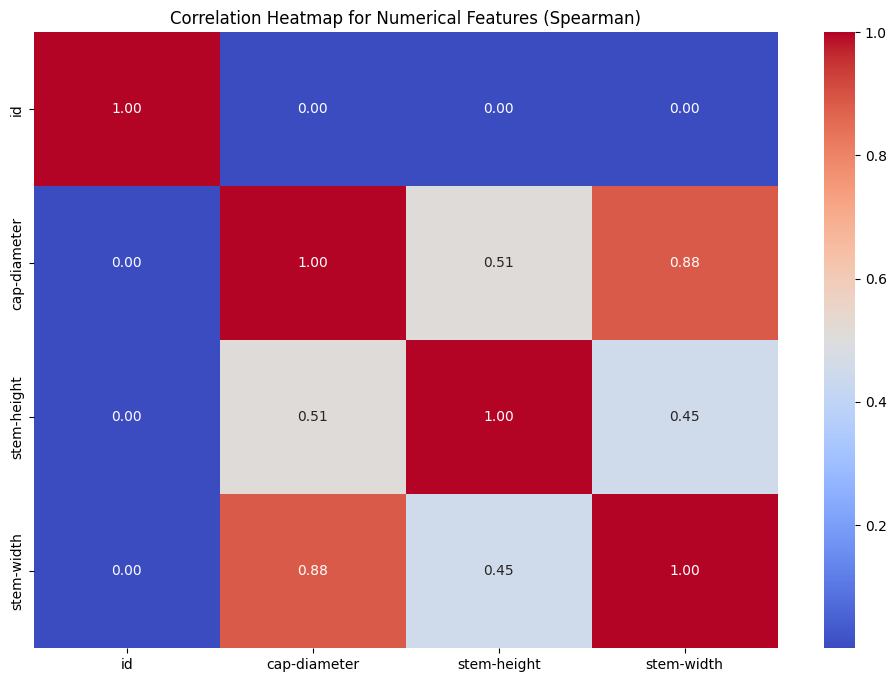

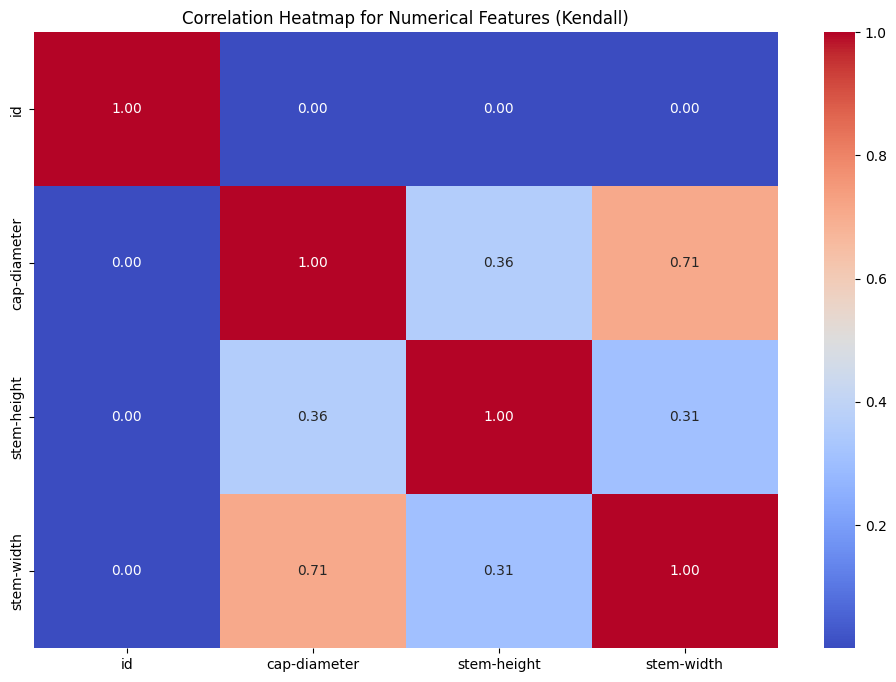

In [ ]:
# ------------------ Correlation Analysis for Numerical Features ------------------>>> categorical encoded using target (expected high correlation)

plt.figure(figsize=(12, 8))
sns.heatmap(train_imputed[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Numerical Features (Pearson)')
plt.show()
plt.figure(figsize=(12, 8))
sns.heatmap(train_imputed[numerical_cols].corr(method='spearman'), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Numerical Features (Spearman)')
plt.show()
plt.figure(figsize=(12, 8))
sns.heatmap(train_imputed[numerical_cols].corr(method='kendall'), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Numerical Features (Kendall)')
plt.show()

In [ ]:
# stem-width & cap-diameter is high correlated -> will drop one and keep the highest correlated with the target

In [ ]:
# Pearson
stem_width_pearson = train_imputed['stem-width'].corr(train_imputed['class'], method='pearson')
cap_diameter_pearson = train_imputed['cap-diameter'].corr(train_imputed['class'], method='pearson')

# Spearman
stem_width_spearman = train_imputed['stem-width'].corr(train_imputed['class'], method='spearman')
cap_diameter_spearman = train_imputed['cap-diameter'].corr(train_imputed['class'], method='spearman')

# Kendall
stem_width_kendall = train_imputed['stem-width'].corr(train_imputed['class'], method='kendall')
cap_diameter_kendall = train_imputed['cap-diameter'].corr(train_imputed['class'], method='kendall')

# Print results
print(f"Pearson correlation between 'stem-width' and 'class': {stem_width_pearson}")
print(f"Spearman correlation between 'stem-width' and 'class': {stem_width_spearman}")
print(f"Kendall correlation between 'stem-width' and 'class': {stem_width_kendall}\n")

print(f"Pearson correlation between 'cap-diameter' and 'class': {cap_diameter_pearson}")
print(f"Spearman correlation between 'cap-diameter' and 'class': {cap_diameter_spearman}")
print(f"Kendall correlation between 'cap-diameter' and 'class': {cap_diameter_kendall}")

Pearson correlation between 'stem-width' and 'class': -0.16934260357984848
Spearman correlation between 'stem-width' and 'class': -0.22160116090702292
Kendall correlation between 'stem-width' and 'class': -0.18099223947462714

Pearson correlation between 'cap-diameter' and 'class': -0.1622962730474319
Spearman correlation between 'cap-diameter' and 'class': -0.19821371816220826
Kendall correlation between 'cap-diameter' and 'class': -0.16192168554973005


In [ ]:
# will drop cap-diameter

train_imputed = train_imputed.drop('cap-diameter', axis=1)
val_imputed = val_imputed.drop('cap-diameter', axis=1)
test_imputed = test_imputed.drop('cap-diameter', axis=1)

In [ ]:
numerical_cols.remove('cap-diameter')

### get df with outliers first

In [ ]:
train_imputed.columns

Index(['id', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
       'gill-attachment', 'gill-color', 'stem-height', 'stem-width',
       'stem-color', 'has-ring', 'ring-type', 'habitat', 'season', 'class'],
      dtype='object')

In [ ]:
X_train_W_outliers = train_imputed.drop(columns='class')
y_train_W_outliers = train_imputed['class']

df_CV_W_outliers = pd.concat([train_imputed, val_imputed], axis=0)

df_CV_W_outliers.drop('id', axis=1, inplace=True)
X_train_W_outliers.drop('id', axis=1, inplace=True)
X_CV_W_outliers = df_CV_W_outliers.drop(columns='class')
y_CV_W_outliers = df_CV_W_outliers['class']

In [ ]:
# prompt: check outliers on the train_imputed on the numerical features and report the number of outliers for each feature

def find_outliers_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

for col in numerical_cols:
  outliers = find_outliers_iqr(train_imputed[col])
  print(f"precentage of outliers in {col}: {len(outliers)/len(train_imputed[col])}")


precentage of outliers in stem-height: 0.04251077577563929
precentage of outliers in stem-width: 0.02135424269597314



Outlier distribution for 'stem-height':
class            0          1
outlier                      
False    45.506843  54.493157
True     40.318670  59.681330


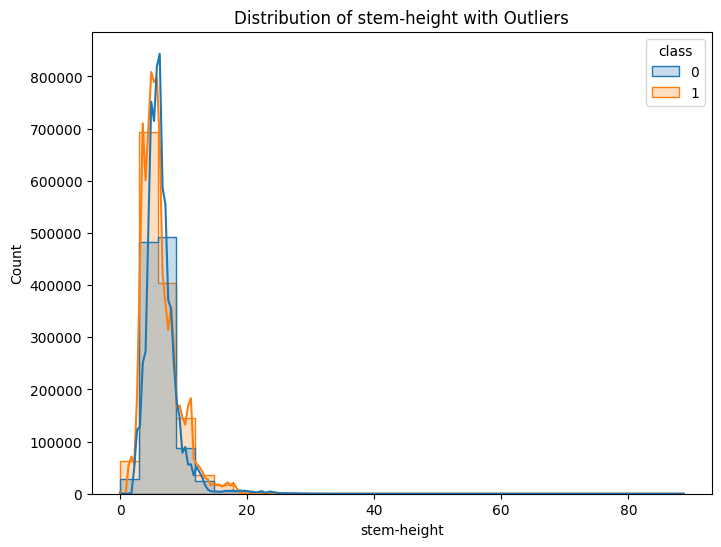


Outlier distribution for 'stem-width':
class            0          1
outlier                      
False    45.613423  54.386577
True     30.294096  69.705904


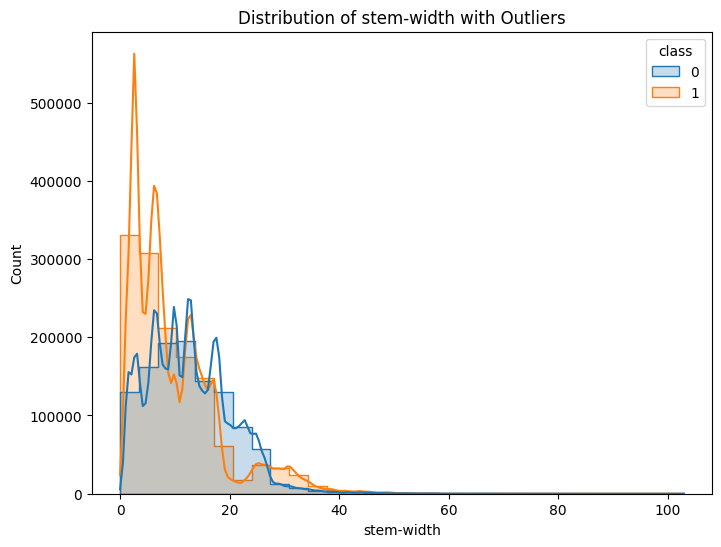

In [ ]:
def analyze_outlier_distribution(df, numerical_cols):
    for col in numerical_cols:
        temp_df = df[[col, 'class']].copy()

        # Calculate IQR and bounds
        Q1 = temp_df[col].quantile(0.25)
        Q3 = temp_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers in the temp copy
        temp_df['outlier'] = (temp_df[col] < lower_bound) | (temp_df[col] > upper_bound)

        # Analyze outlier distribution by class
        print(f"\nOutlier distribution for '{col}':")
        print(pd.crosstab(temp_df['outlier'], temp_df['class'], normalize='index') * 100)

        # Plot the distribution
        plt.figure(figsize=(8, 6))
        sns.histplot(data=temp_df, x=col, hue='class', bins=30, kde=True, element="step")
        plt.title(f'Distribution of {col} with Outliers')
        plt.show()

analyze_outlier_distribution(train_imputed, numerical_cols)

In [ ]:
def drop_outliers_iqr(df, numerical_cols):
    df_no_outliers = df.copy()
    for col in numerical_cols:
        Q1 = df_no_outliers[col].quantile(0.25)
        Q3 = df_no_outliers[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]
    return df_no_outliers

In [ ]:
train_no_outliers = drop_outliers_iqr(train_imputed, numerical_cols)

In [ ]:
train_no_outliers.drop('id', axis=1, inplace=True)
val_imputed.drop('id', axis=1, inplace=True)

In [ ]:
X_train = train_no_outliers.drop(columns='class')
y_train = train_no_outliers['class']

X_val = val_imputed.drop(columns='class')
y_val = val_imputed['class']

In [ ]:
X_test = test_imputed.copy()

In [ ]:
X_train.head()

,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
586767,0.506153,0.536653,0.723765,0.540544,0.535647,0.477453,3.80,12.36,0.645514,0.514937,0.525929,0.527753,0.557072
2665706,0.736670,0.385118,0.465919,0.540544,0.535647,0.398293,5.23,3.09,0.414497,0.514937,0.525929,0.527753,0.569363
1270574,0.506153,0.593939,0.669971,0.540544,0.530656,0.477453,7.17,20.57,0.414497,0.514937,0.525929,0.527753,0.557072
2935630,0.664881,0.569780,0.465919,0.517721,0.595261,0.672389,6.20,8.83,0.596504,0.514937,0.525929,0.527753,0.557072
3113991,0.506153,0.536653,0.822167,0.540544,0.535647,0.676460,3.23,12.29,0.645514,0.514937,0.525929,0.527753,0.557072


In [ ]:
df_CV = pd.concat([train_imputed, val_imputed], axis=0)

X_CV = df_CV.drop(columns='class')
y_CV = df_CV['class']

In [ ]:
X_CV.drop('id', axis=1, inplace=True)

In [ ]:
X_CV.head()

,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
586767,0.506153,0.536653,0.723765,0.540544,0.535647,0.477453,3.80,12.36,0.645514,0.514937,0.525929,0.527753,0.557072
2665706,0.736670,0.385118,0.465919,0.540544,0.535647,0.398293,5.23,3.09,0.414497,0.514937,0.525929,0.527753,0.569363
1270574,0.506153,0.593939,0.669971,0.540544,0.530656,0.477453,7.17,20.57,0.414497,0.514937,0.525929,0.527753,0.557072
2935630,0.664881,0.569780,0.465919,0.517721,0.595261,0.672389,6.20,8.83,0.596504,0.514937,0.525929,0.527753,0.557072
3113991,0.506153,0.536653,0.822167,0.540544,0.535647,0.676460,3.23,12.29,0.645514,0.514937,0.525929,0.527753,0.557072


# tree based Model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, matthews_corrcoef
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def evaluate_model(name, model, X_train, y_train, X_val, y_val):
    print(f"\n=== {name} ===")

    # Train Predictions
    y_train_pred = model.predict(X_train)
    print("---- Train Metrics ----")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"Train MCC: {matthews_corrcoef(y_train, y_train_pred):.4f}")

    # Validation Predictions
    y_val_pred = model.predict(X_val)
    print("---- Validation Metrics ----")
    print(confusion_matrix(y_val, y_val_pred))
    print(classification_report(y_val, y_val_pred))
    print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
    print(f"Validation MCC: {matthews_corrcoef(y_val, y_val_pred):.4f}")

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
evaluate_model("Decision Tree", dt_model, X_train, y_train, X_val, y_val)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
evaluate_model("Random Forest", rf_model, X_train, y_train, X_val, y_val)


=== Decision Tree ===
---- Train Metrics ----
[[1071450     123]
 [    780 1262547]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1071573
           1       1.00      1.00      1.00   1263327

    accuracy                           1.00   2334900
   macro avg       1.00      1.00      1.00   2334900
weighted avg       1.00      1.00      1.00   2334900

Train Accuracy: 0.9996
Train MCC: 0.9992
---- Validation Metrics ----
[[275625   6685]
 [  6571 334508]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    282310
           1       0.98      0.98      0.98    341079

    accuracy                           0.98    623389
   macro avg       0.98      0.98      0.98    623389
weighted avg       0.98      0.98      0.98    623389

Validation Accuracy: 0.9787
Validation MCC: 0.9571

=== Random Forest ===
---- Train Metrics ----
[[1071149     424]
 [    518 1262809]]
              prec

In [ ]:
# Random Forest increaseing the number of estimators
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
evaluate_model("Random Forest (double estimators)", rf_model, X_train, y_train, X_val, y_val)


=== Random Forest (double estimators) ===
---- Train Metrics ----
[[1071163     410]
 [    494 1262833]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1071573
           1       1.00      1.00      1.00   1263327

    accuracy                           1.00   2334900
   macro avg       1.00      1.00      1.00   2334900
weighted avg       1.00      1.00      1.00   2334900

Train Accuracy: 0.9996
Train MCC: 0.9992
---- Validation Metrics ----
[[278996   3314]
 [  3508 337571]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    282310
           1       0.99      0.99      0.99    341079

    accuracy                           0.99    623389
   macro avg       0.99      0.99      0.99    623389
weighted avg       0.99      0.99      0.99    623389

Validation Accuracy: 0.9891
Validation MCC: 0.9779


In [ ]:
test_predictions = rf_model.predict(X_test.drop(columns=['id']))

submission = pd.DataFrame({
    'id': X_test['id'],
    'prediction': test_predictions
})

In [ ]:
submission = submission.replace({0: 'e', 1: 'p'})

In [ ]:
submission.head()

,id,prediction
0,3116945.0,e
1,3116946.0,p
2,3116947.0,p
3,3116948.0,p
4,3116949.0,e


In [ ]:
submission.to_csv("submission_rf_200_estimator.csv", index=False)

## try on data with outliers

In [ ]:
X_train_W_outliers.head()

,id,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
586767,586767.0,0.506153,0.536653,0.723765,0.540544,0.535647,0.477453,3.80,12.36,0.645514,0.514937,0.525929,0.527753,0.557072
2665706,2665706.0,0.736670,0.385118,0.465919,0.540544,0.535647,0.398293,5.23,3.09,0.414497,0.514937,0.525929,0.527753,0.569363
1270574,1270574.0,0.506153,0.593939,0.669971,0.540544,0.530656,0.477453,7.17,20.57,0.414497,0.514937,0.525929,0.527753,0.557072
2935630,2935630.0,0.664881,0.569780,0.465919,0.517721,0.595261,0.672389,6.20,8.83,0.596504,0.514937,0.525929,0.527753,0.557072
3113991,3113991.0,0.506153,0.536653,0.822167,0.540544,0.535647,0.676460,3.23,12.29,0.645514,0.514937,0.525929,0.527753,0.557072


In [ ]:
X_val.head()

,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
1745452,0.528021,0.619159,0.465919,0.540544,0.641705,0.541809,7.55,7.06,0.608732,0.514937,0.525929,0.527753,0.338740
288331,0.057551,0.536653,0.465919,0.540544,0.535647,0.477453,5.00,26.53,0.566347,0.514937,0.525929,0.527753,0.569363
421615,0.528021,0.536653,0.465499,0.540544,0.595261,0.541809,2.72,18.36,0.414497,0.514937,0.525929,0.527753,0.344495
2794259,0.664881,0.569780,0.384977,0.517721,0.595261,0.557273,4.27,5.97,0.252659,0.514937,0.525929,0.527753,0.569363
78948,0.664881,0.619159,0.477485,0.540544,0.641705,0.541809,4.83,22.90,0.414497,0.514937,0.525929,0.527753,0.569363


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_W_outliers, y_train_W_outliers)
evaluate_model("Random Forest", rf_model, X_train_W_outliers, y_train_W_outliers, X_val, y_val)


=== Random Forest ===
---- Train Metrics ----
[[1128786     453]
 [    525 1363792]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1129239
           1       1.00      1.00      1.00   1364317

    accuracy                           1.00   2493556
   macro avg       1.00      1.00      1.00   2493556
weighted avg       1.00      1.00      1.00   2493556

Train Accuracy: 0.9996
Train MCC: 0.9992
---- Validation Metrics ----
[[279338   2972]
 [  3564 337515]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    282310
           1       0.99      0.99      0.99    341079

    accuracy                           0.99    623389
   macro avg       0.99      0.99      0.99    623389
weighted avg       0.99      0.99      0.99    623389

Validation Accuracy: 0.9895
Validation MCC: 0.9788


In [ ]:
test_predictions = rf_model.predict(X_test.drop(columns=['id']))

submission = pd.DataFrame({
    'id': X_test['id'],
    'prediction': test_predictions
})
submission = submission.replace({0: 'e', 1: 'p'})

In [ ]:
submission.to_csv("submission_rf_100_estimator_W_outliers.csv", index=False)

In [ ]:
import os

output_dir = '/content/drive/MyDrive/Data/ML_Project_Data'
os.makedirs(output_dir, exist_ok=True)


# Save the dataframes to the ML_Project folder on your Google Drive

# X_CV.to_csv(os.path.join(output_dir, 'X_CV.csv'), index=False)
# y_CV.to_csv(os.path.join(output_dir, 'y_CV.csv'), index=False)

X_CV_W_outliers.to_csv(os.path.join(output_dir, 'X_CV_W_outliers.csv'), index=False)
y_CV_W_outliers.to_csv(os.path.join(output_dir, 'y_CV_W_outliers.csv'), index=False)

# X_train.to_csv(os.path.join(output_dir, 'X_train.csv'), index=False)
# y_train.to_csv(os.path.join(output_dir, 'y_train.csv'), index=False)

X_train_W_outliers.to_csv(os.path.join(output_dir, 'X_train_W_outliers.csv'), index=False)
y_train_W_outliers.to_csv(os.path.join(output_dir, 'y_train_W_outliers.csv'), index=False)

# X_val.to_csv(os.path.join(output_dir, 'X_val.csv'), index=False)
# y_val.to_csv(os.path.join(output_dir, 'y_val.csv'), index=False)

# X_test.to_csv(os.path.join(output_dir, 'X_test.csv'), index=False)
